In [12]:
import emoji
import re
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 18000
# embedding_dim = 64
max_length = 120
# filters = 100
# kernel_size = 3
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [3]:
emoji_list = emoji.UNICODE_EMOJI.keys()

In [4]:
data = pd.read_csv("data/Twitter_Data.csv")
labels = list(data['Annotation'])
texts = list(data['Tweets'])
print(len(texts))
print(len(labels))

16907
16907


In [5]:
FLAGS = re.MULTILINE | re.DOTALL

def allcaps(text):
    text = text.group()
    return text.lower() + " <allcaps>"


def preprocess(text):
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)
    
    text = text.replace("#","<hashtag> ")
    
    no_emoji = ''
    for char in text:
        if char not in emoji_list:
            no_emoji = no_emoji + char
        else:
            no_emoji = no_emoji + '<' + emoji.demojize(char) + '> '
    text = no_emoji
    
    text = re_sub(r"@\w+","<user>")
    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "<url>")
    text = re_sub(r"/"," / ")
    text = re_sub(r"([!?.]){2,}", r"\1 <repeat>")
    text = re_sub(r"\b(\S*?)(.)\2{2,}\b", r"\1\2 <elong>")

    text = re_sub(r"([A-Z]){2,}", allcaps)
    
    punctuations = '''!()-[]{};:'"\,./?@#$%^&*_~0123456789'''
    
    no_punct = ''
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    text = no_punct
    text = text.replace("  "," ")
    text = text.replace("\n"," ")
    return text.lower()


In [6]:
for i in range(0, len(texts)):
    texts[i] = preprocess(texts[i])

In [7]:
test_case = '@narendra_modi thanks @trump for his support in #vaccine. read at  http://pandas.pydata.org/pandas-docs/s 😳😳'
print(preprocess(test_case))
print(texts[26])

<user> thanks <user> for his support in <hashtag> vaccine read at <url> <flushedface> <flushedface> 
rt <allcaps> <user> <hashtag> muslim <hashtag> islam welcome to the hotel islamfornia may check out any time but never leave <url> http  …


In [8]:
divide = int(len(data)*training_portion)
train_tweets, validation_tweets, train_labels, validation_labels = texts[:divide], texts[divide:], labels[:divide], labels[divide:]
print(len(train_tweets))
print(len(train_labels))
print(len(validation_tweets))
print(len(validation_labels))

13525
13525
3382
3382


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_tweets)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_tweets)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(word_index))
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

15060
13
120
22
120


In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_tweets)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

3382
(3382, 120)


In [13]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

padded_validation_label_seq = pad_sequences(validation_label_seq, padding=padding_type, maxlen=1, truncating=trunc_type)
train_lables_padded = pad_sequences(training_label_seq, padding=padding_type, maxlen=1, truncating=trunc_type)

category_word_index = label_tokenizer.word_index

In [14]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [24]:
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
# print(oops)


In [36]:
stopwords = set(STOPWORDS)
stopwords.add("allcaps")
stopwords.add("hashtag")
stopwords.add("user")
stopwords.add("elong")
stopwords.add("url")
stopwords.add("repeat")
stopwords.add("RT")

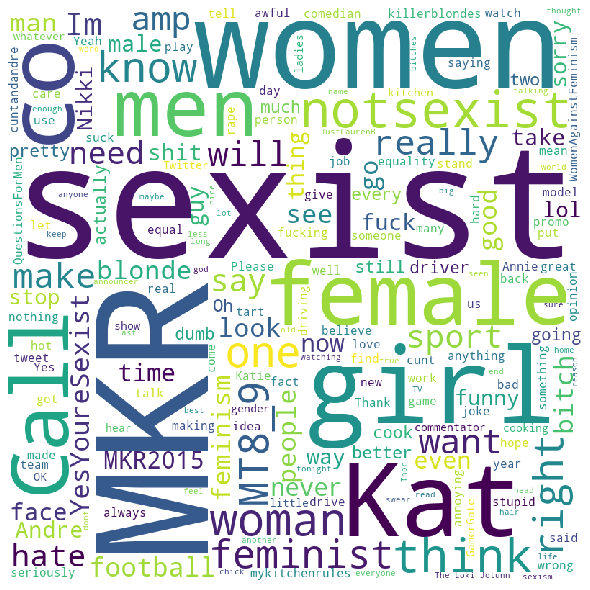

In [37]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

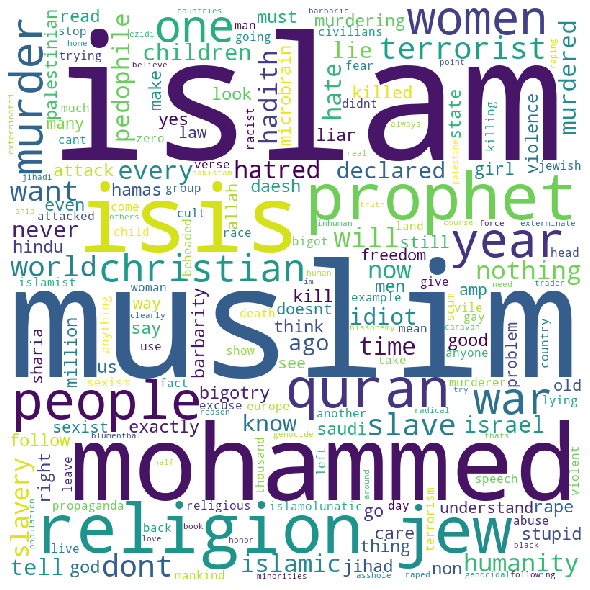

In [46]:
with open('data/racism.json', 'r') as file:
    data_racism = pd.read_json(file,lines=True)
texts = list(data_racism['text'])
for i in range(0, len(texts)):
    texts[i] = preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

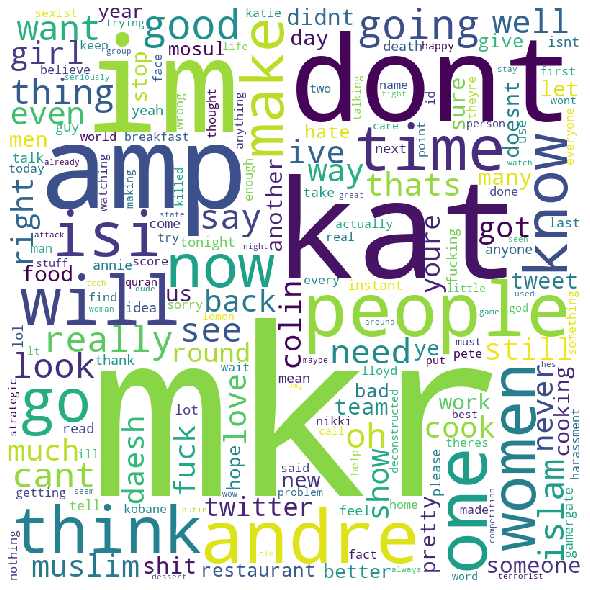

In [45]:
with open('data/neither.json', 'r') as file:
    data_neither = pd.read_json(file,lines=True)
texts = list(data_neither['text'])
for i in range(0, len(texts)):
    texts[i] = preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

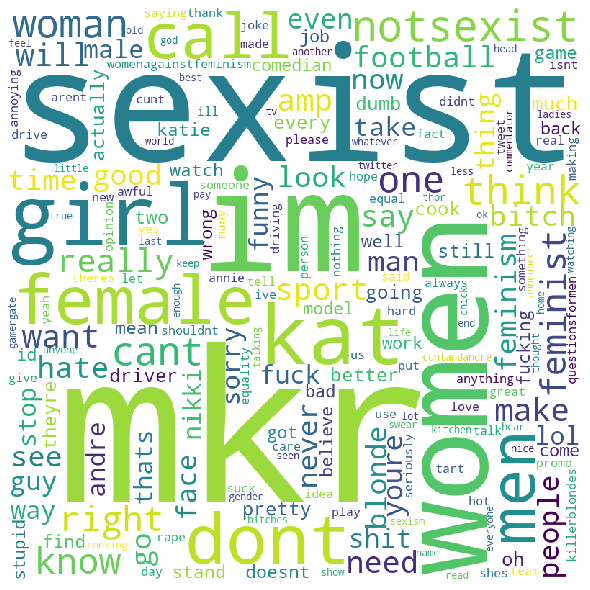

In [44]:
with open('data/sexism.json', 'r') as file:
    data_sexism = pd.read_json(file,lines=True)
texts = list(data_sexism['text'])
for i in range(0, len(texts)):
    texts[i] = preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 